In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
#import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

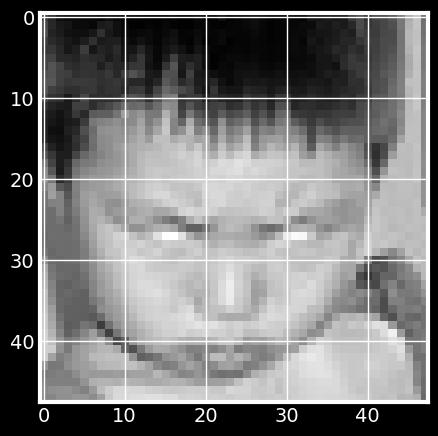

(48, 48)


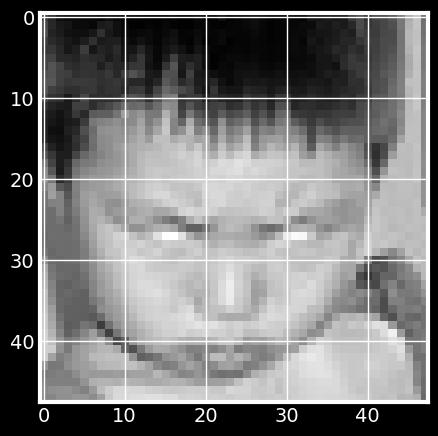

<class 'numpy.ndarray'>


In [55]:
DATADIR = "train"
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 48

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()      


import random

random.shuffle(training_data)


x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(type(y))

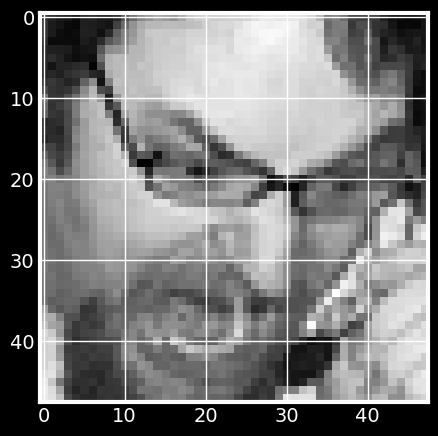

(48, 48)


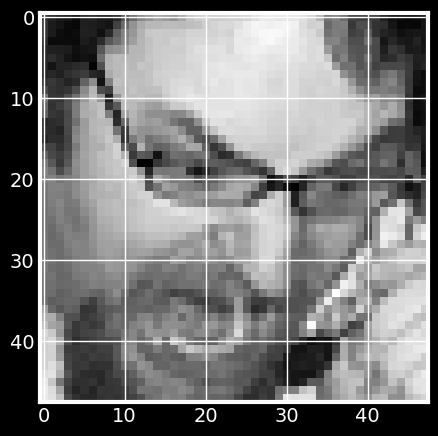

In [56]:
DATA = "test"
CATEGO = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
for category in CATEGO:
    path = os.path.join(DATA, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
SIZE = 48

new_array = cv2.resize(img_array, (SIZE, SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGO:
        path = os.path.join(DATA, category)
        class_num = CATEGO.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (SIZE, SIZE))
                #print(new_array, class_num)
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_testing_data()      


import random

random.shuffle(training_data)


x_test = []
y_test = []

for features, label in training_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y)

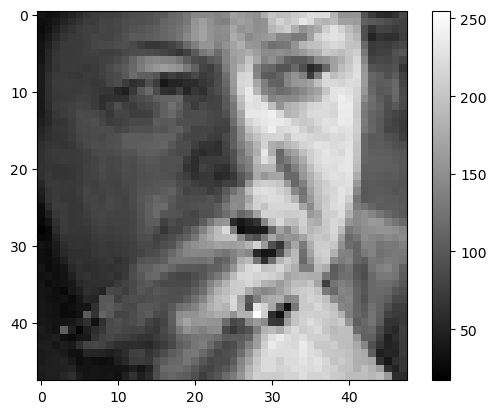

In [13]:
plt.figure()
plt.imshow(x[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

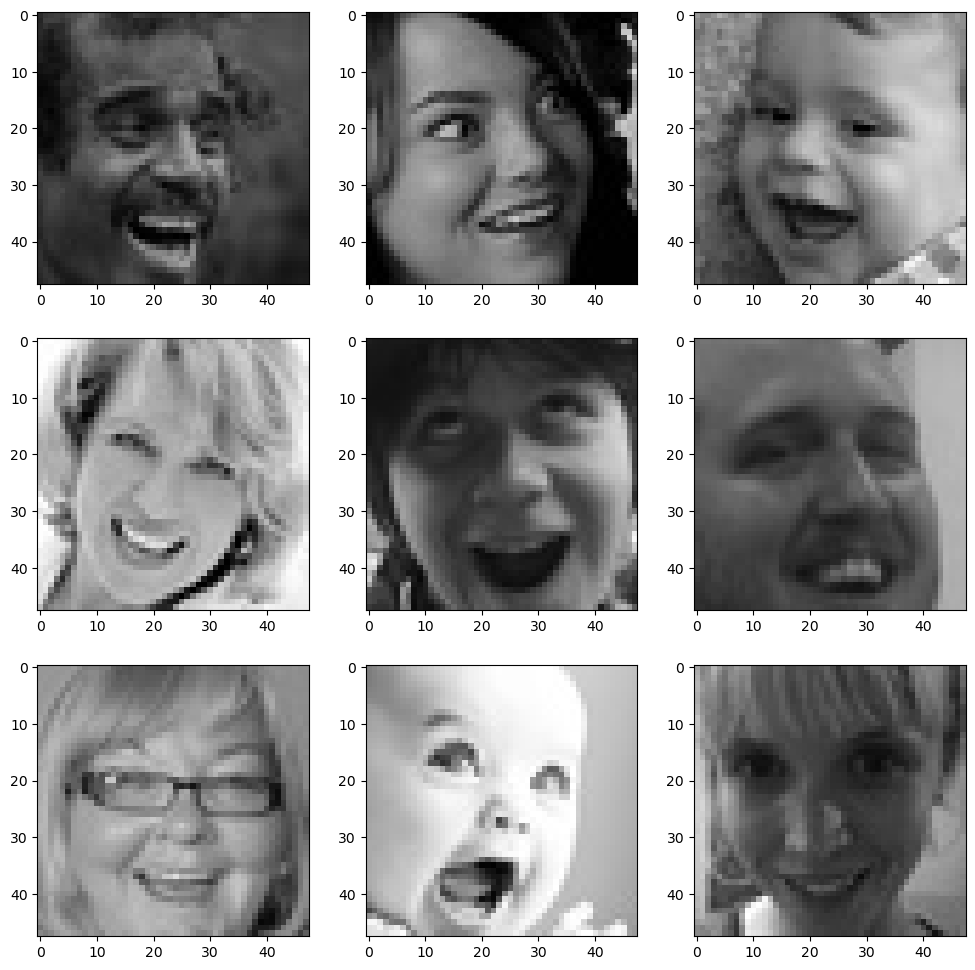

In [14]:
expression = 'happy'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR + '/' + expression + '/' + os.listdir(DATADIR + '/' + expression)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

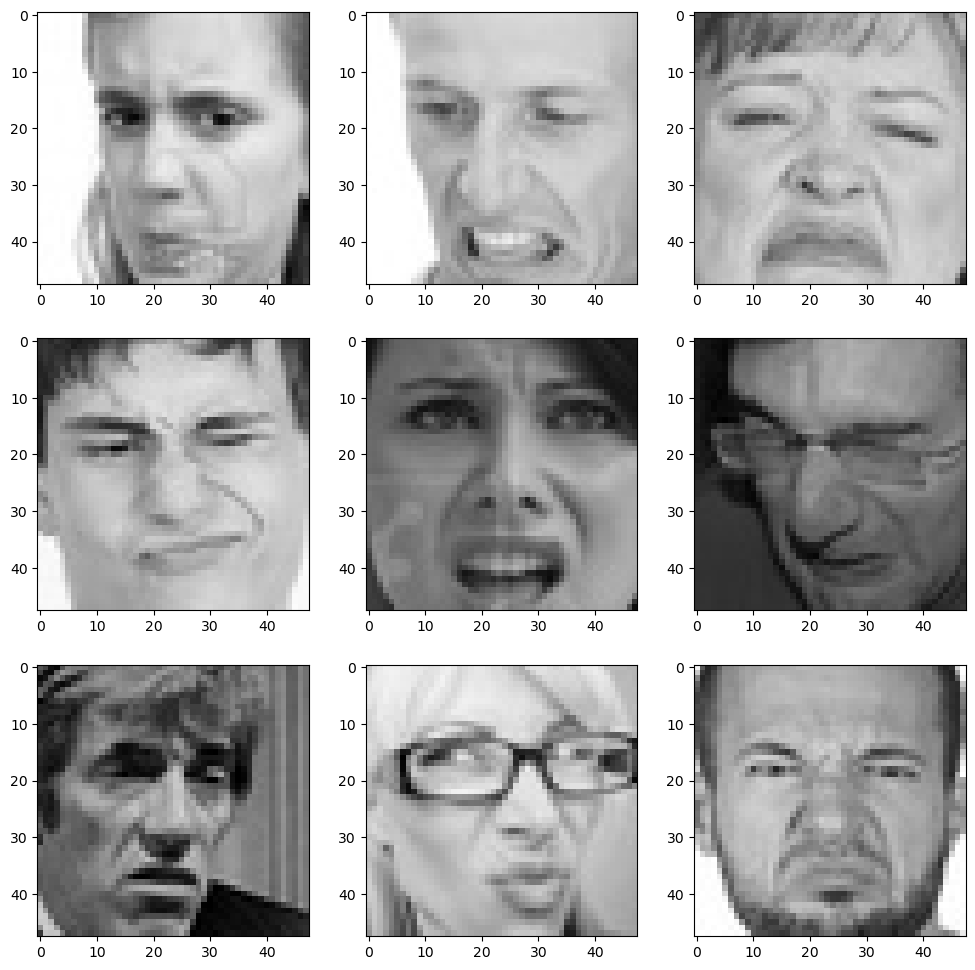

In [15]:
expression = 'disgust'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR + '/' + expression + '/' + os.listdir(DATADIR + '/' + expression)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

In [58]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48, 1)
(28709,)
(28709, 48, 48, 1)
(28709,)


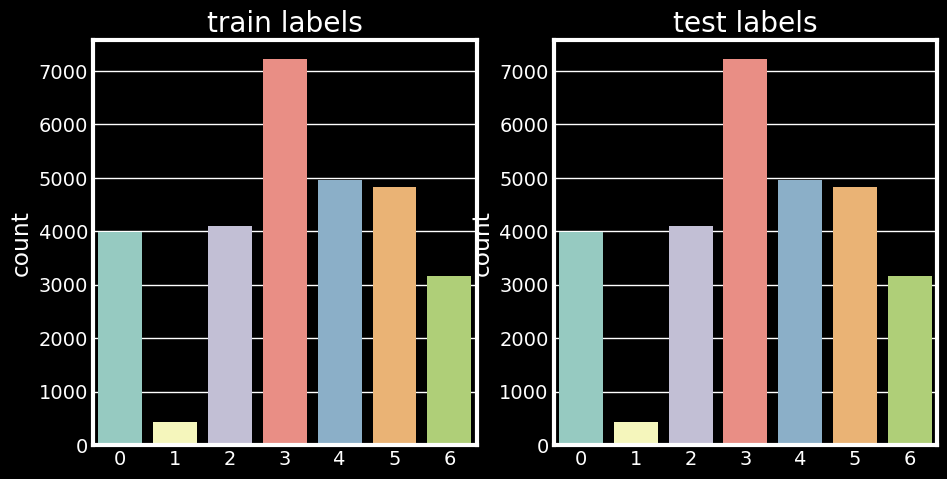

In [48]:
import seaborn as sns
plt.style.use('dark_background')
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([y , y_test] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [19]:
x=x/255.0
model = Sequential()
model.add(Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
model.add(Dense(512, activation=tf.nn.relu))
#model.add(Dense(256, activation='sigmoid'))
model.add(Dense(512, activation='relu')) 
model.add(Dense(14, activation=tf.nn.softmax))
#print (model.summary())
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 14)                7182      
                                                                 
Total params: 1,449,998
Trainable params: 1,449,998
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(x ,y ,batch_size = 128, epochs=20, validation_data=(x,y))

Epoch 1/20
225/225 [==============================] - 15s 52ms/step - loss: 51.2080 - accuracy: 0.9277 - val_loss: 59.4592 - val_accuracy: 0.9139
Epoch 2/20
225/225 [==============================] - 10s 46ms/step - loss: 53.3930 - accuracy: 0.9246 - val_loss: 33.6316 - val_accuracy: 0.9473
Epoch 3/20
225/225 [==============================] - 11s 47ms/step - loss: 52.3827 - accuracy: 0.9256 - val_loss: 73.3493 - val_accuracy: 0.9045
Epoch 4/20
225/225 [==============================] - 10s 46ms/step - loss: 49.5698 - accuracy: 0.9272 - val_loss: 62.9749 - val_accuracy: 0.9148
Epoch 5/20
225/225 [==============================] - 11s 47ms/step - loss: 51.8443 - accuracy: 0.9241 - val_loss: 58.3410 - val_accuracy: 0.9180
Epoch 6/20
225/225 [==============================] - 11s 47ms/step - loss: 40.3380 - accuracy: 0.9368 - val_loss: 46.8929 - val_accuracy: 0.9285
Epoch 7/20
225/225 [==============================] - 11s 47ms/step - loss: 44.3434 - accuracy: 0.9309 - val_loss: 69.2725 -

In [104]:
results = model.evaluate(x_test,y_test)
preds   = model.predict(x_test)

898/898 [==============================] - 4s 4ms/step


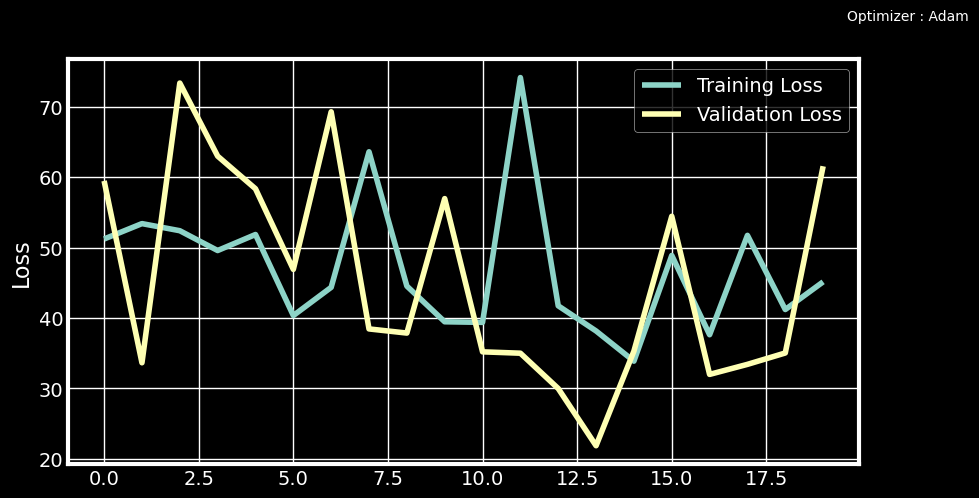

In [121]:
plt.style.use('dark_background')

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')



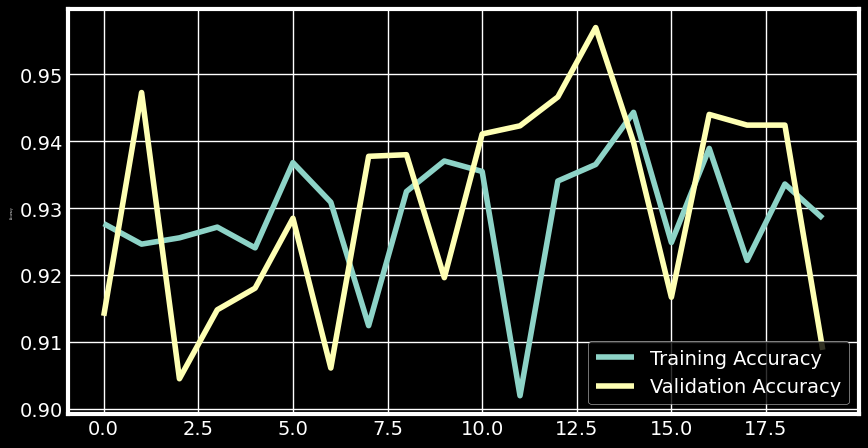

In [123]:
plt.style.use('dark_background')

plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [106]:
results = model.evaluate(x_test, y_test)
preds   = model.predict(x_test)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

898/898 [==============================] - 4s 4ms/step
The current model achieved a categorical accuracy of 90.88%!


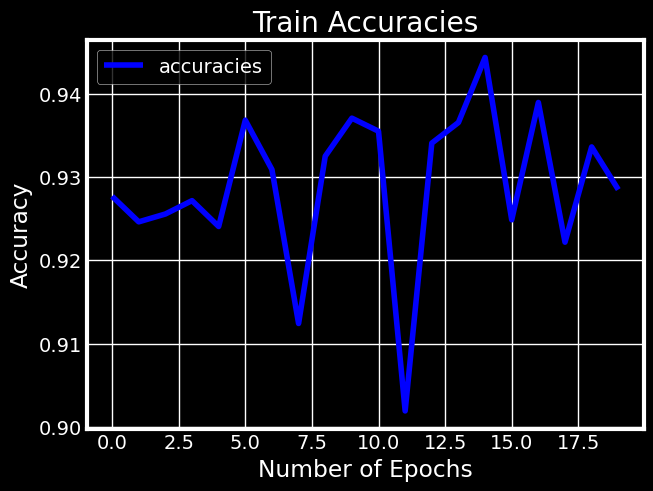

In [107]:

plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

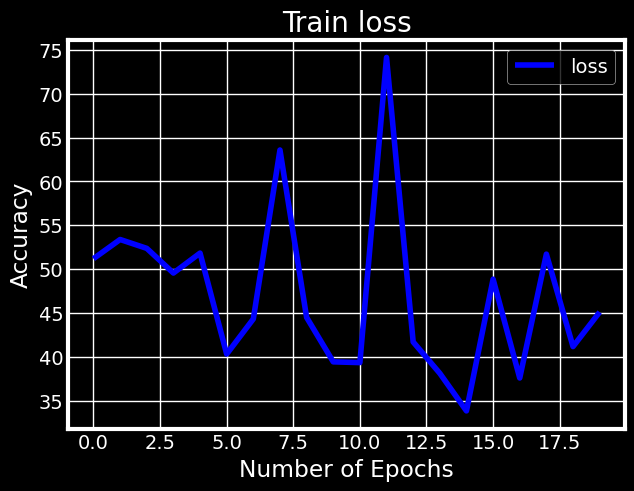

In [108]:
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

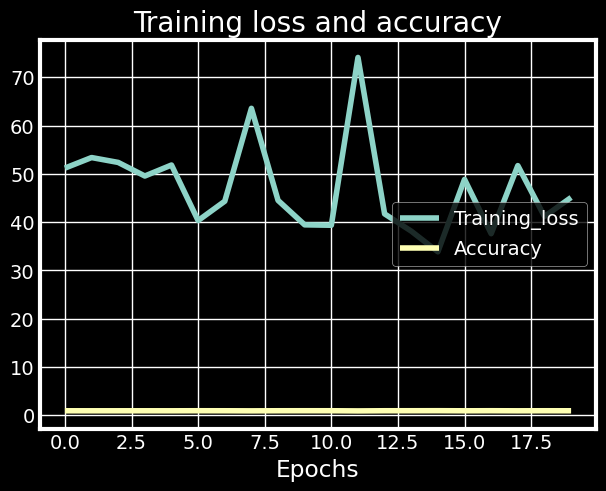

In [110]:
N=20 #epoch
plt.style.use('dark_background')
plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

In [111]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]

898/898 [==============================] - 4s 4ms/step


In [112]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

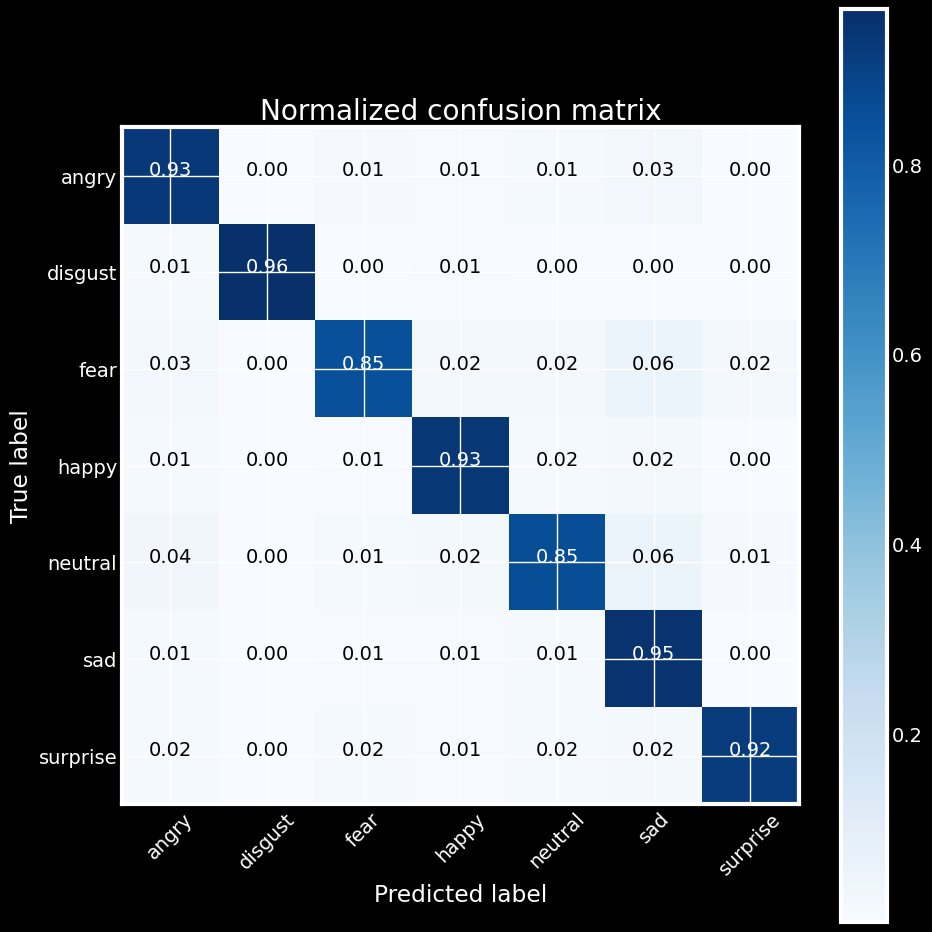

In [113]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.style.use('dark_background')
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES, title='Normalized confusion matrix')
plt.show()

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:" ,format(round(val_acc[-1]*100,2)))
print("loss =:        " ,format(round(loss[-1]*100,2)))
print("val_loss =:    " ,format(round(val_loss[-1]*100,2)))

accuracy =:     92.85
val_accuracy =: 90.88
loss =:         4512.27
val_loss =:     6153.75


ROC AUC score: 0.9492377747335503


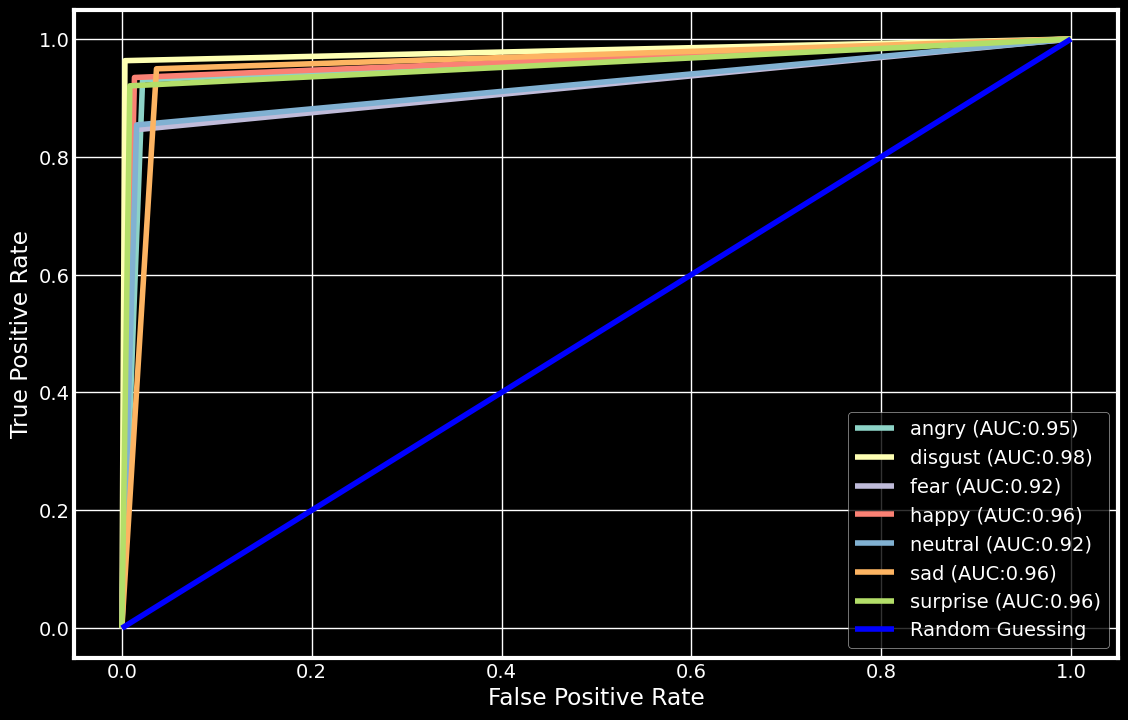

In [115]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
plt.style.use('dark_background')

CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(CATEGORIES):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [124]:
model.save("new2.model")

INFO:tensorflow:Assets written to: new2.model\assets


INFO:tensorflow:Assets written to: new2.model\assets


In [94]:
# Predict random image
k = random.randint(0, (len(x_test)))

In [95]:
pred1 = model.predict(x_test[k].reshape(1, IMG_SIZE, IMG_SIZE, 1))
print(pred1.argmax())
print("This image is : ", CATEGORIES[pred1.argmax()])

1/1 [==============================] - 0s 26ms/step
3
This image is :  happy


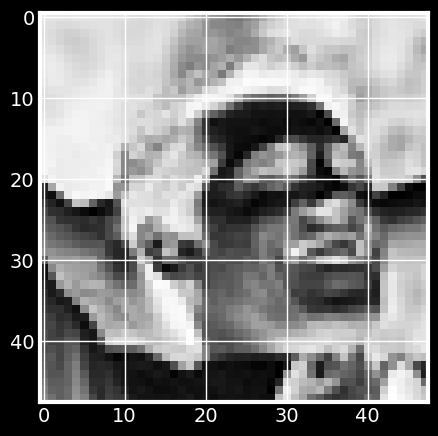

In [96]:
pic2 = x_test[k].reshape(IMG_SIZE, IMG_SIZE)
plt.imshow(pic2, cmap = 'Greys')

In [65]:
def prepare(filepath):
    IMG_SIZ=48
    im=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(im,(IMG_SIZ,IMG_SIZ))
    return new_img

In [97]:
prediction=model.predict(np.array([prepare("test/happy/PrivateTest_1140198.jpg")]))

1/1 [==============================] - 0s 25ms/step


In [98]:
prediction

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [99]:
def kind(prediction ):    
    if prediction[0][0]==1:
        key = "this image for: Angry"
    if prediction[0][1]==1:
        key = "this image for: Disgust"
    if prediction[0][2]==1:
        key = "this image for: Fear"
    if prediction[0][3]==1:
        key = "this image for: Happy"
    if prediction[0][4]==1:
        key = "this image for: Neutral"    
    if prediction[0][5]==1:
        key = "this image for: Sad"
    if prediction[0][6]==1:
        key = "this image for: Surprise"
        
    return key

In [102]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image

 


root = Tk()
root.title("Facial Expression Recognition")
#root.geometry("1000x700")

 

frame = tk.Frame(root, bg='#0A2F3C')

 


lbl_pic_path = tk.Label(frame, text='Image Path:', padx=25, pady=25,font=('verdana',16), bg='#0A2F3C')

 

lbl_show_pic = tk.Label(frame, bg='#45aaf2')

 

entry_pic_path = tk.Entry(frame, font=('verdana',16))

 

btn_browse = tk.Button(frame, text='Select Image',bg='grey', fg='#ffffff',font=('verdana',16))

 

lbl_pic_kind = tk.Label(frame, padx=25, pady=25,font=('verdana',16), bg='#0A2F3C')

 

# , Image.ANTIALIAS

 

def selectPic():
    global img
    global filename
    filename = filedialog.askopenfilename(initialdir="/images", title="Select Image",
                           filetypes=(("png images","*.png"),("jpg images","*.jpg")))
    img = Image.open(filename)
    img = img.resize((400,300))
    img = ImageTk.PhotoImage(img)
    lbl_show_pic['image'] = img
    entry_pic_path.insert(0, filename)
    prediction=model.predict(np.array([prepare(str(filename))]))   
    ko = kind( prediction)
    lbl_pic_kind = tk.Label(frame, text=ko, padx=25, pady=25,font=('verdana',16), bg='#0A2F3C')
    lbl_pic_kind.grid(row=2, column=0, columnspan="2")

 

 

   

 

btn_browse['command'] = selectPic

 

frame.pack()

 

lbl_pic_path.grid(row=0, column=0)
entry_pic_path.grid(row=0, column=1, padx=(0,20))
lbl_show_pic.grid(row=1, column=0, columnspan="2")
lbl_pic_kind.grid(row=2, column=0, columnspan="2")
btn_browse.grid(row=2, column=2, columnspan="2", padx=10, pady=10)

 

root.mainloop()

1/1 [==============================] - 0s 31ms/step
